**Overview**

When building quantum circuits, there are several properties that help quantify the "size" of the circuits and their ability to be operated in a noisy quantum device. Some of these, such as the number of qubits, are easy to understand; others, such as depth and the number of tensor components, require a bit more explanation. Here we will explain all these properties and highlight the conditions under which they change, in preparation for understanding how the circuits change when operated in real devices.

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)

**Let's talk about this code.** 

This for loop implements a series of Hadamard gates (Hadamard Gate) and CNOT gates (Controlled-X Gate) from 0 to 4 (5 times). These gates ensure that initially every qubit from 0 to 4 is superpositioned (the Hadamard Gate does this) and then qubits 0 to 4 are connected to qubits 5 to 9.

In [2]:
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)

In this section, specific connections and gates are implemented using more CNOT gates and X gates. For example, a CNOT gate is applied between qubit 1 and qubit 7, while an X gate is applied to qubit 8 and then a CNOT gate is applied between qubit 1 and qubit 9.

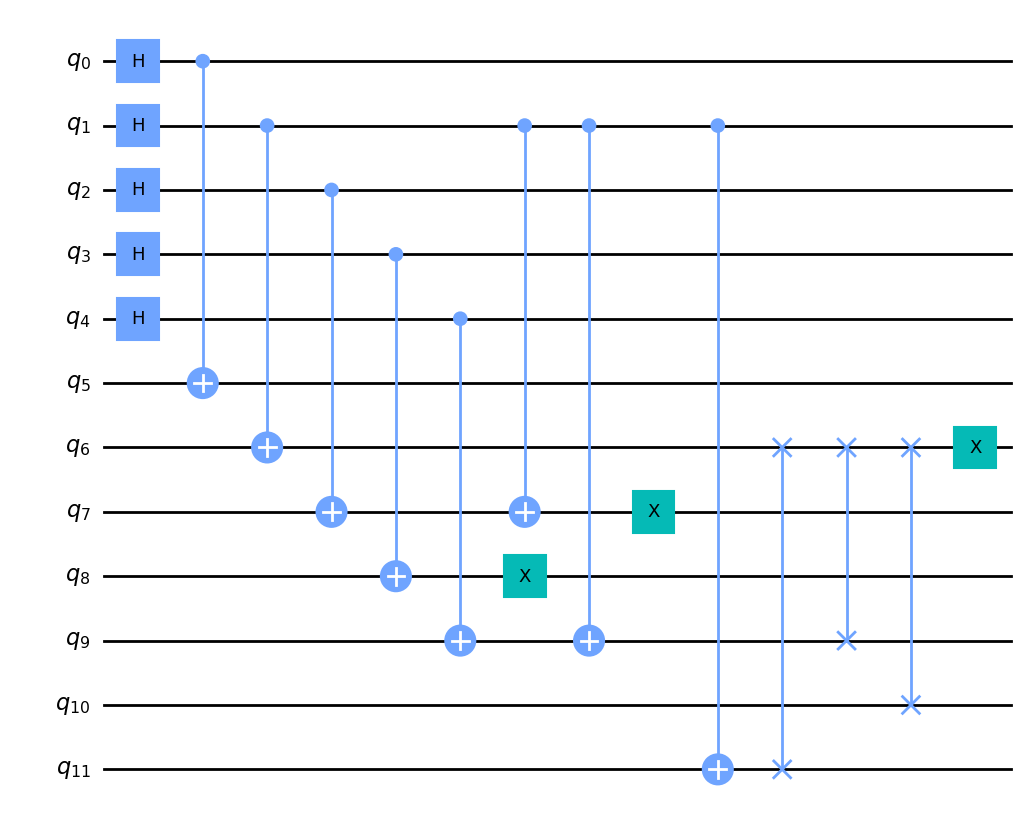

In [3]:
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw('mpl')

In this section, some qubits are swapped using **SWAP gates**. The 6th qubit is swapped with the 11th qubit and then the 6th qubit is also swapped with the 9th qubit and the 10th qubit. Finally, the X gate is applied to the 6th qubit.

I can see from the drawing that this circuit;
* 12 cubits,
* Hadamard, 
* CNOT, 
* X and 
* It is easy to see that it has a collection of SWAP gates.

But how can we measure this programmatically? Here is a short answer to this question;

* **Since we can make single qubit gates on all qubits at the same time, the number of qubits in this circuit is equal to the width of the circuit**

In [4]:
# Let's measure the width
qc.width()

12

* **We can also get the number of qubits directly:**

In [5]:
# Let's Learn the Number of Cubits
qc.num_qubits

12

-----------

**Important.**

**For a quantum circuit consisting only of qubits, the circuit width is equal to the number of qubits.** This is the definition used in quantum computing. But for more complex circuits with classically controlled gates, this equivalence breaks down. Therefore, it is no longer correct to refer to the number of qubits in a quantum circuit as the width. 

------------------

So what do we do if **Quantum Circuits** seems too complicated? We can use the **.count_ops** function for this. 

In [6]:
# If we want to learn about the Quantum Circuit

qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

* **By calculating the cycles we can also get only the raw number of operations. For this;**

In [7]:
# Number of Raw Transactions 

qc.size()

19

One particularly important circuit property is known as circuit depth. The depth of a quantum circuit is a measure of how many "layers" of quantum gates executed in parallel are required to complete the computation defined by the circuit. Since quantum gates take time to implement, the depth of a circuit roughly corresponds to the time taken by the quantum computer to execute the circuit. The depth of a circuit is therefore an important quantity used to measure whether a quantum circuit can be run on a device.

The depth of a quantum circuit has a mathematical definition as the longest path in a **Directed Acyclic Graph (DAG)**. 

In [8]:
# If we want to find the depth of a quantum circuit

qc.depth()

9